# Correlation Analysis B

To examine the relationship of the model parameters between axis orientations


## Requirements


In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(ggpubr)
    library(rstatix)
    library(dplyr)
    library(lme4)
    library(AICcmodavg)
    library(MuMIn)
    library(emmeans)
    library(patchwork)
}))

options(warn = -1) # turn-off warnings

## Data preparation

In [1]:
library(readxl)
setwd("C:/DataForR")
getwd()
data = read_excel("ProcessedData.xlsx", sheet = "ModelParams")
data

[1] "C:/DataForR"

subject No.,Axis Orientation,orientation No.,gamma: preference parameter,g: mutual inhibition parameter,average hysteresis [SN],scaled alpha1 (descending),scaled alpha2 (ascending)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal,0,1.5960115,1.0204008,0.5000,0.5937500,0.6354167
1,Oblique,1,0.8823529,1.0000000,0.0000,0.4687500,0.4687500
2,Orthogonal,0,3.0023179,1.0281911,0.2500,0.7395833,0.7604167
2,Oblique,1,0.7614447,1.0028783,-0.1250,0.4375000,0.4270833
3,Orthogonal,0,1.4000000,1.0000000,0.0000,0.5833333,0.5833333
3,Oblique,1,1.2343952,1.0178347,1.0000,0.5104167,0.5937500
4,Orthogonal,0,3.7416574,1.2864959,2.5000,0.6666667,0.8750000
4,Oblique,1,1.4969356,1.0306770,0.8750,0.5625000,0.6354167
5,Orthogonal,0,1.5829979,1.1370830,3.2500,0.4687500,0.7395833


In [3]:
# create a dataframe based on the required columns of data:
subject = unique(data[,"subject No."])

Gamma1 = data[data$`orientation No.`==0, "gamma: preference parameter"]
Gamma2 = data[data$`orientation No.`==1, "gamma: preference parameter"]

G1 = data[data$`orientation No.`==0, "g: mutual inhibition parameter"]
G2 = data[data$`orientation No.`==1, "g: mutual inhibition parameter"]

Hys1 = data[data$`orientation No.`==0, "average hysteresis [SN]"]
Hys2 = data[data$`orientation No.`==1, "average hysteresis [SN]"]

mydata = data.frame(subject,Gamma1,Gamma2,G1,G2,Hys1,Hys2)
colnames(mydata) = c("subject","Gamma1","Gamma2","G1","G2","Hys1","Hys2")

mydata

subject,Gamma1,Gamma2,G1,G2,Hys1,Hys2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.5960115,0.8823529,1.0204008,1.0000000,0.5000,0.0000
2,3.0023179,0.7614447,1.0281911,1.0028783,0.2500,-0.1250
3,1.4000000,1.2343952,1.0000000,1.0178347,0.0000,1.0000
4,3.7416574,1.4969356,1.2864959,1.0306770,2.5000,0.8750
5,1.5829979,1.0430302,1.1370830,1.0043995,3.2500,1.2500
6,1.1952286,1.1642833,1.0458250,1.0306770,3.0000,2.3750
7,2.3677121,1.1615818,1.1518599,1.0237670,1.7500,1.8750
8,1.1105117,0.8445862,1.0076865,0.9824778,0.8750,1.2500
9,1.8515357,0.9577272,1.1001879,0.9919317,1.7500,2.2500


## Hysteresis

In [4]:
res = cor.test(mydata$Hys1, mydata$Hys2, method="pearson")

text0 = paste0("r = ", round(res$estimate,3), ",   CI = [", round(res$conf.int[1],3), ", ", round(res$conf.int[2],3), "]")
text0

[1] "r = 0.806,   CI = [0.643, 0.899]"

`geom_smooth()` using formula = 'y ~ x'


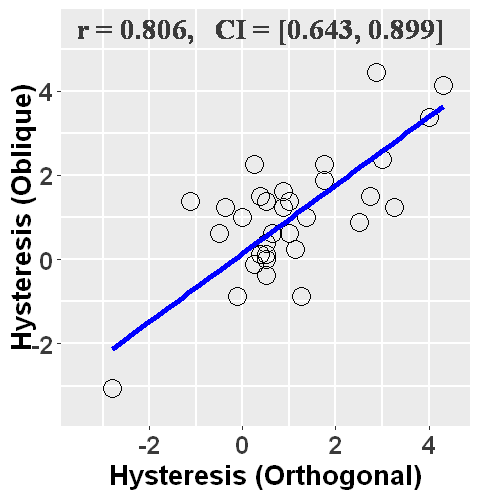

In [5]:
# scatter plot with the regression line:
options(repr.plot.height=4.1, repr.plot.width=4)

p1 = ggplot(mydata, aes(x=Hys1, y=Hys2)) + 
    geom_point(size=5, shape = 1) +
    geom_smooth(method=lm, se=FALSE, fill="violet", color="blue", size=1.5) +
    labs(y="Hysteresis (Oblique)", x="Hysteresis (Orthogonal)") + 
    coord_cartesian(ylim = c(-3.5, 5.5), xlim = c(-3.5, 4.5)) + 
#     scale_y_continuous(breaks=c(0, 0.25, 0.50, 0.75, 1.00)) + 
    theme(axis.title.x = element_text(size = 16, face="bold"),
          axis.title.y = element_text(size = 16, face="bold"),
          axis.text.x  = element_text(size = 15, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 15, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) +
    geom_text(x=-3.55, y=5.5, label=text0, fontface="bold", hjust = 0, size=6.2, color = "#3a3a3a", family = "serif") # ("sans", "serif", "mono")

p1

## Gamma

In [6]:
res = cor.test(mydata$Gamma1, mydata$Gamma2, method="pearson")

text0 = paste0("r = ", round(res$estimate,3), ",   CI = [", round(res$conf.int[1],3), ", ", round(res$conf.int[2],3), "]")
text0

[1] "r = 0.098,   CI = [-0.249, 0.422]"

`geom_smooth()` using formula = 'y ~ x'


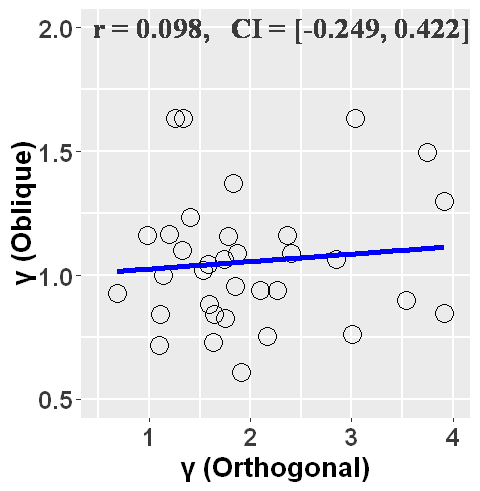

In [7]:
# scatter plot with the regression line:
options(repr.plot.height=4.1, repr.plot.width=4)

p2 = ggplot(mydata, aes(x=Gamma1, y=Gamma2)) + 
    geom_point(size=5, shape = 1) +
    geom_smooth(method=lm, se=FALSE, fill="violet", color="blue", size=1.5) +
    labs(y="\u03b3 (Oblique)", x="\u03b3 (Orthogonal)") + 
    coord_cartesian(ylim = c(0.5, 2), xlim = c(0.5, 4)) + 
#     scale_y_continuous(breaks=c(0, 0.25, 0.50, 0.75, 1.00)) + 
    theme(axis.title.x = element_text(size = 16, face="bold"),
          axis.title.y = element_text(size = 16, face="bold"),
          axis.text.x  = element_text(size = 15, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 15, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) +
    geom_text(x=0.45, y=2, label=text0, fontface="bold", hjust = 0, size=6.2, color = "#3a3a3a", family = "serif") # ("sans", "serif", "mono")

p2

## G

In [8]:
res = cor.test(mydata$G1, mydata$G2, method="pearson")

text0 = paste0("r = ", round(res$estimate,3), ",   CI = [", round(res$conf.int[1],3), ", ", round(res$conf.int[2],3), "]")
text0

[1] "r = 0.156,   CI = [-0.192, 0.469]"

`geom_smooth()` using formula = 'y ~ x'


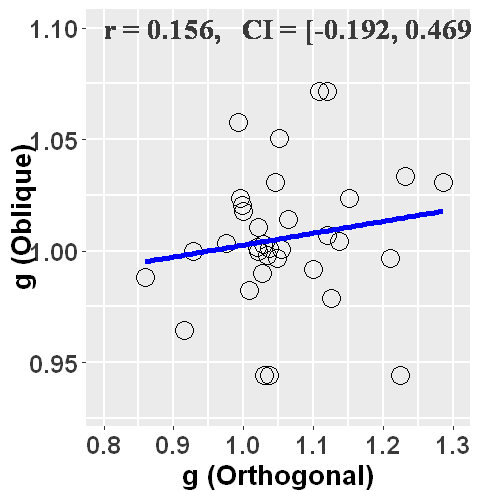

In [9]:
# scatter plot with the regression line:
options(repr.plot.height=4.1, repr.plot.width=4)

p3 = ggplot(mydata, aes(x=G1, y=G2)) + 
    geom_point(size=5, shape = 1) +
    geom_smooth(method=lm, se=FALSE, fill="violet", color="blue", size=1.5) +
    labs(y="g (Oblique)", x="g (Orthogonal)") + 
    coord_cartesian(ylim = c(0.93, 1.1), xlim = c(0.8, 1.3)) + 
#     scale_y_continuous(breaks=c(0, 0.25, 0.50, 0.75, 1.00)) + 
    theme(axis.title.x = element_text(size = 16, face="bold"),
          axis.title.y = element_text(size = 16, face="bold"),
          axis.text.x  = element_text(size = 15, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 15, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) +
    geom_text(x=0.8, y=1.1, label=text0, fontface="bold", hjust = 0, size=6.2, color = "#3a3a3a", family = "serif") # ("sans", "serif", "mono")
p3

In [10]:
cor.test(mydata$G1, mydata$G2, method="pearson")


	Pearson's product-moment correlation

data:  mydata$G1 and mydata$G2
t = 0.893, df = 32, p-value = 0.3785
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1923798  0.4693470
sample estimates:
      cor 
0.1559301 


### integrated plots

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


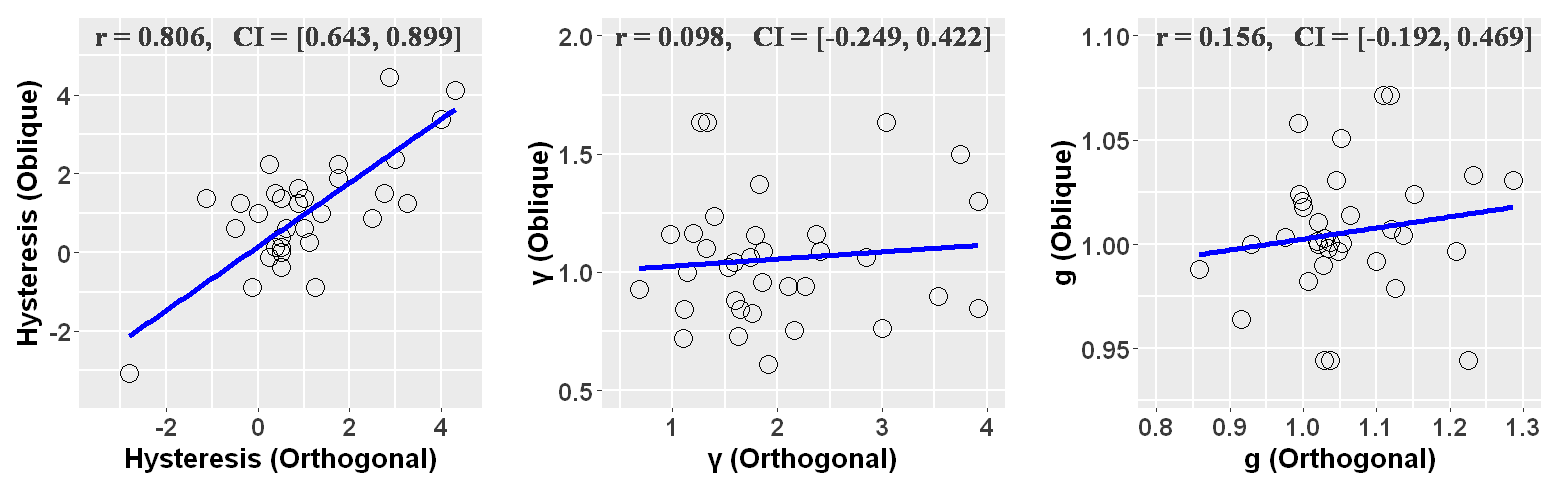

In [12]:
options(repr.plot.height=4.1, repr.plot.width=13)

p1 + theme(axis.title.y = element_text(vjust = 1.5)) + 
    plot_spacer() + 
    p2 + theme(axis.title.y = element_text(vjust = 1.5)) + 
    plot_spacer() + 
    p3 + theme(axis.title.y = element_text(vjust = 1.5)) + 
    plot_layout(nrow = 1, widths = c(4,0.1,4,0.1,4)) 

# save plot:
ggsave("plot_Correlation_B.jpg", dpi = 300, height = 4.1, width = 13)
